In [3]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
df = pd.read_csv('ai4i2020.csv')

In [6]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [8]:
# Check null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [9]:
# Descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [10]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

,count,unique,top,freq
Product ID,10000,10000,M14860,1
Type,10000,3,L,6000


Text(0.5, 1.0, 'Number of failure types per record')

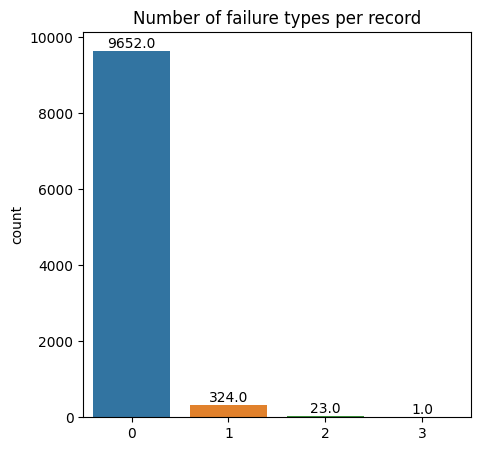

In [11]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

In [12]:
# Data Preparation

df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

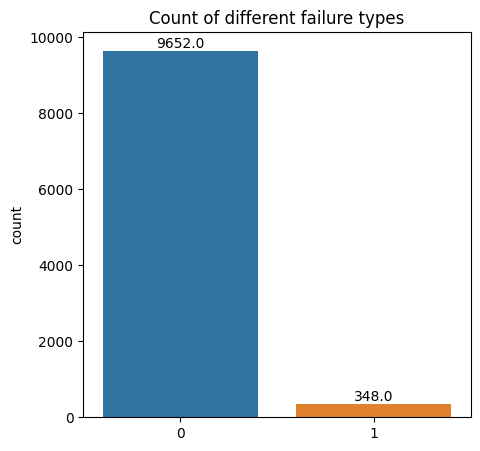

In [13]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

In [16]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [17]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)
# view columns data types
df.dtypes

Type                       float64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Machine failure            float64
dtype: object

In [18]:
#Handling Outliers

# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

In [20]:
#Normalization
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

In [22]:
#Split the data

from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = y)

In [23]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

Model

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

In [27]:
# Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

In [28]:
#Evaluation
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2896
         1.0       0.51      0.63      0.56       104

    accuracy                           0.97      3000
   macro avg       0.75      0.81      0.77      3000
weighted avg       0.97      0.97      0.97      3000



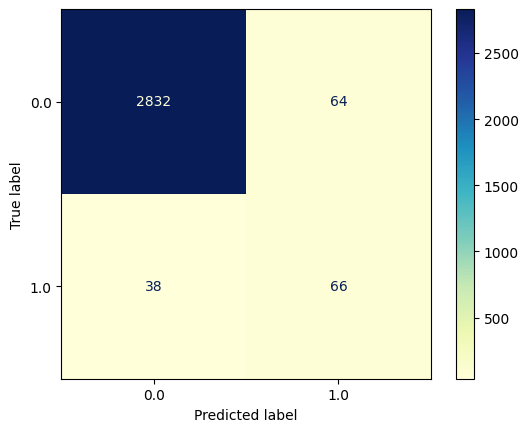

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [35]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

In [39]:
print("Knn \n" + classification_report(y_test, y_predictions))

Knn 
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      2896
         1.0       0.18      0.76      0.28       104

    accuracy                           0.87      3000
   macro avg       0.58      0.82      0.61      3000
weighted avg       0.96      0.87      0.90      3000



In [30]:
# k-NN (K-nearest neighbors) Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'n_neighbors': 2}


In [31]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

In [32]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2896
         1.0       0.53      0.50      0.51       104

    accuracy                           0.97      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.97      0.97      0.97      3000



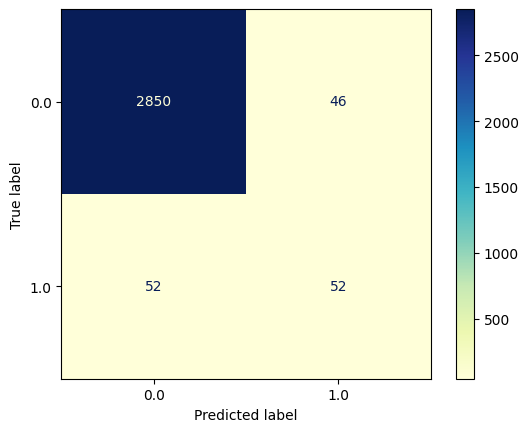

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

In [40]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.966000,0.970152,0.966000,0.967812,0.061553,0.002113
k-NN,0.967333,0.966430,0.967333,0.966865,0.058232,0.433724
Gaussian Naive Bayes,0.867667,0.961938,0.867667,0.904819,0.008978,0.003481
